In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import random
random.seed(123)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle
import numpy as np  #to run array operations
import matplotlib.pyplot as plt   # to plot the or to show the images
import os    #to iterate throgh directories
import cv2 
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
K.image_data_format()

'channels_last'

In [3]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tqdm import tqdm

In [4]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [5]:
training_data = []
print(X.shape)
print(y.shape)

(83484, 128, 128, 3)
(83484,)


In [15]:
train = []


In [23]:
for i in range(len(X)):
    training_data.append([X[i],y[i]])

In [27]:
import random
random.shuffle(training_data)

3


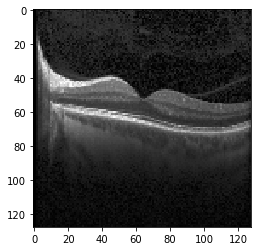

In [29]:
from matplotlib import pyplot as plt
data = training_data[0][0]
print(training_data[0][1])
plt.imshow(data, interpolation='nearest')
plt.show()

In [4]:
import os
import sys
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings('ignore')

D:\Dhanush\Anaconda\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [5]:
# SET LIBRARY DIRECTORY
LIB_DIR = "E:/oct images"

# To give access to automl files
sys.path.insert(0, LIB_DIR)
sys.path.insert(0, os.path.join(LIB_DIR, "automl-master"))
sys.path.insert(0, os.path.join(LIB_DIR, "automl-master", "efficientnetv2"))

In [6]:
# EfficientDET Module Imports
import effnetv2_configs
import preprocessing
import effnetv2_model
import hparams
import utils

In [7]:
enetV2_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[128, 128, 3]),
    effnetv2_model.get_model('efficientnetv2-b0', include_top=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4, activation='softmax'),
])

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


In [8]:
enetV2_model.load_weights('weights.hdf5')

In [9]:
learning_rate = 0.0001
opt = Adam(lr = learning_rate) 
enetV2_model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [10]:
test_path = 'E:/oct images/OCT2017_/test'
CATEGORIES = ["CNV","DME","DRUSEN","NORMAL"]
IMG_SIZE = 128
myTestList = os.listdir(test_path)

In [11]:
from tqdm import tqdm
A=[]
b=[]
for x in myTestList:
  myPicList = os.listdir(test_path+"/"+str(x))
  for i in tqdm(myPicList):
    curImg = cv2.imread(test_path+"/"+str(x)+"/"+i)
    curImg = cv2.resize(curImg,(IMG_SIZE,IMG_SIZE))
    A.append(curImg)
    b.append(CATEGORIES.index(x))

100%|███████████████████████████████████████████████████████████████████████████████| 242/242 [00:02<00:00, 119.13it/s]


In [12]:
A = np.array(A)
b = np.array(b)

In [14]:
test_results_enetV2 = enetV2_model.evaluate(A, b)
print("test loss, test acc:", test_results_enetV2)

31/31 [==============================] - 18s 352ms/step - loss: 0.0459 - accuracy: 0.9777
test loss, test acc: [0.06786005944013596, 0.9690082669258118]


In [13]:
img_arr = []
img_pred = []    
img_tv = []

In [14]:
pred = enetV2_model.predict(A)
D_test = np.argmax(pred,axis=1)

In [15]:
for i in range(4):
    for j in range(4):
        img_arr.append(A[i*242+j])
        img_pred.append(D_test[i*242+j])
        img_tv.append(b[i*242+j])

In [20]:
for i in range(len(img_arr)):
        #plt.subplot(4,4,i+1)
        #plt.xticks([])
        #plt.yticks([])
        #plt.grid(False)
        print("Image" +  str(i) + " : P - "+CATEGORIES[img_pred[i]] +" T -" +CATEGORIES[img_tv[i]])
        #plt.imshow(img_arr[i])

Image0 : P - CNV T -CNV
Image1 : P - CNV T -CNV
Image2 : P - CNV T -CNV
Image3 : P - CNV T -CNV
Image4 : P - DME T -DME
Image5 : P - DME T -DME
Image6 : P - DME T -DME
Image7 : P - DME T -DME
Image8 : P - DRUSEN T -DRUSEN
Image9 : P - CNV T -DRUSEN
Image10 : P - CNV T -DRUSEN
Image11 : P - DRUSEN T -DRUSEN
Image12 : P - NORMAL T -NORMAL
Image13 : P - NORMAL T -NORMAL
Image14 : P - NORMAL T -NORMAL
Image15 : P - NORMAL T -NORMAL


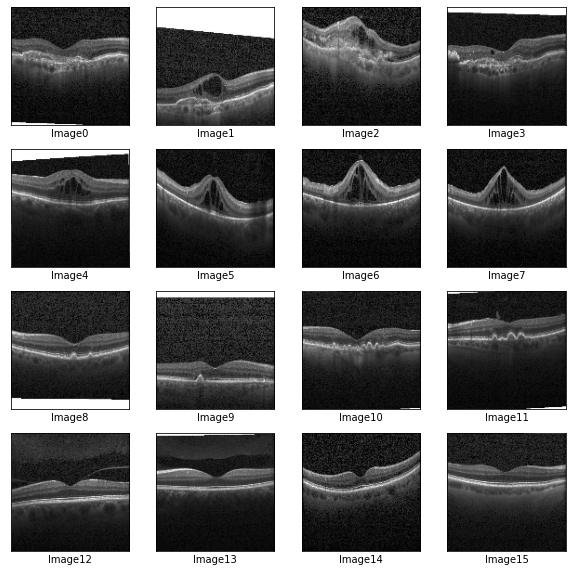

In [21]:
plt.figure(figsize=(10,10))
for i in range(len(img_arr)):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #print("P - "+CATEGORIES[img_pred[i]] +" T -" +CATEGORIES[img_tv[i]])
        plt.imshow(img_arr[i])
        plt.xlabel("Image"+str(i))
plt.show()